## <center>Data Science with Python - Course 2<center>

## Visualization

In [1]:
# Using lmplot
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#pd_tips = pd.read_csv('seaborn-data/tips.csv')
tips = sns.load_dataset('tips')

tips.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


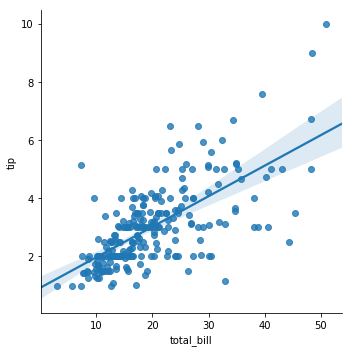

In [8]:
sns.lmplot(x = 'total_bill', y ='tip', data=pd_tips)
plt.show()

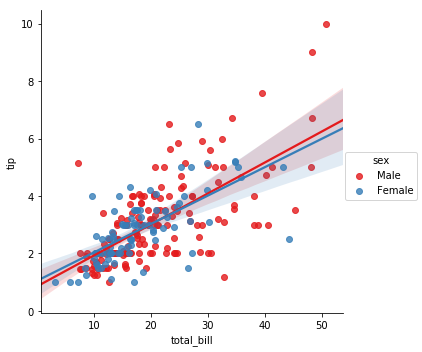

In [9]:
# grouping factor (same plot)
sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex', palette='Set1')
plt.show()

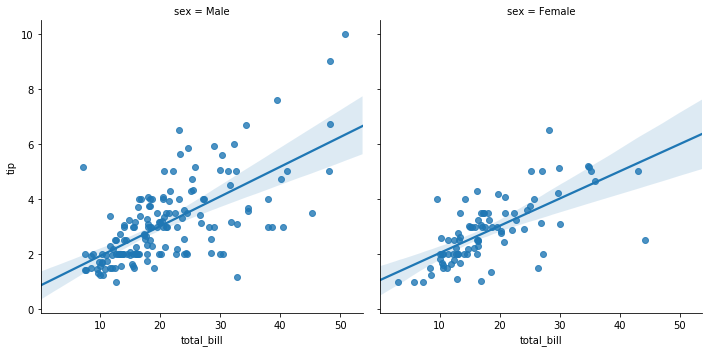

In [10]:
# grouping factor (different plot)
sns.lmplot(x='total_bill', y='tip', data=tips, col='sex')
plt.show()

### Visualize univariate distributions

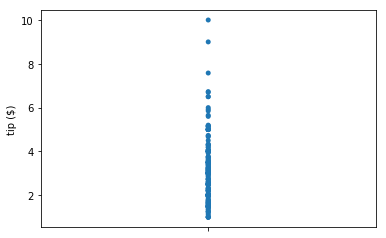

In [12]:
# visualize univariate distributions
# strip plots
sns.stripplot(y= 'tip', data=tips)
plt.ylabel('tip ($)')
plt.show()

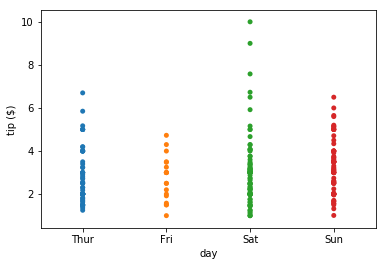

In [14]:
# grouping with strip plots
sns.stripplot(x='day', y='tip', data=tips)
plt.ylabel('tip ($)')
plt.show()

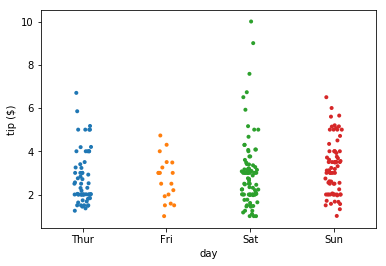

In [16]:
# spread out strip plots
sns.stripplot(x='day', y='tip', data=tips, size=4, jitter=True)
plt.ylabel('tip ($)')
plt.show()

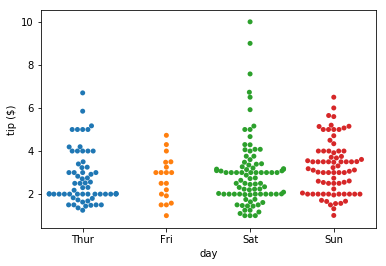

In [17]:
# swarm plots
sns.swarmplot(x='day', y='tip', data=tips)
plt.ylabel('tip ($)')
plt.show()

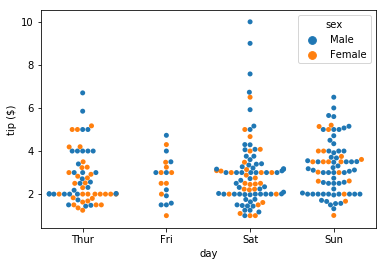

In [18]:
# swarm plots - grouping
sns.swarmplot(x='day', y='tip', data=tips, hue='sex')
plt.ylabel('tip ($)')
plt.show()

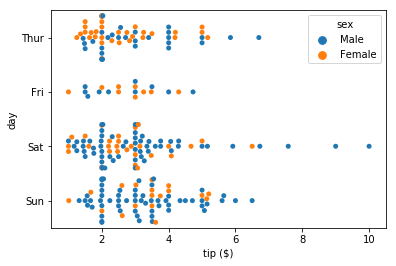

In [19]:
# swarm plot - grouping - orientation
sns.swarmplot(x='tip', y='day', data=tips, hue='sex', orient='h')
plt.xlabel('tip ($)')
plt.show()

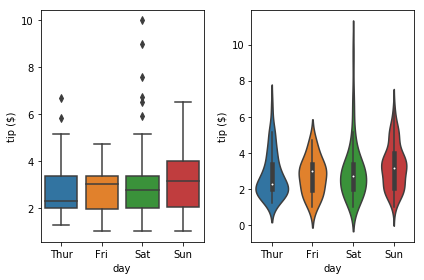

In [20]:
# violin plots
plt.subplot(1,2,1)
sns.boxplot(x='day', y='tip', data=tips)
plt.ylabel('tip ($)')
plt.subplot(1,2,2)
sns.violinplot(x='day', y='tip', data=tips)
plt.ylabel('tip ($)')
plt.tight_layout()
plt.show()

/anaconda3/envs/cv-with-python-1/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/envs/cv-with-python-1/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


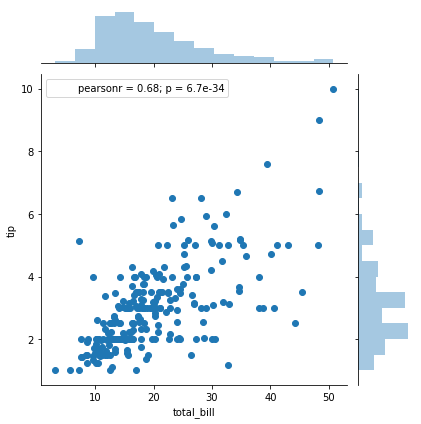

In [21]:
# visualize multivariate distributions
# joint plots
sns.jointplot(x= 'total_bill', y= 'tip', data=tips)
plt.show()

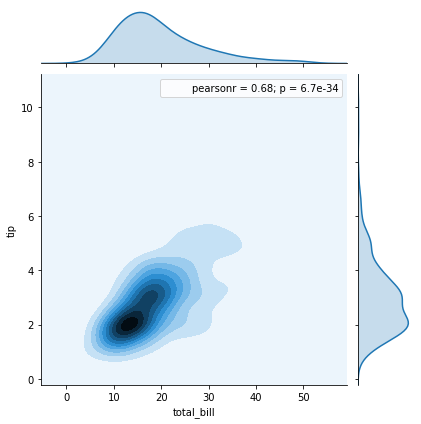

In [22]:
# using kde
sns.jointplot(x='total_bill', y= 'tip', data=tips, kind='kde')
plt.show()

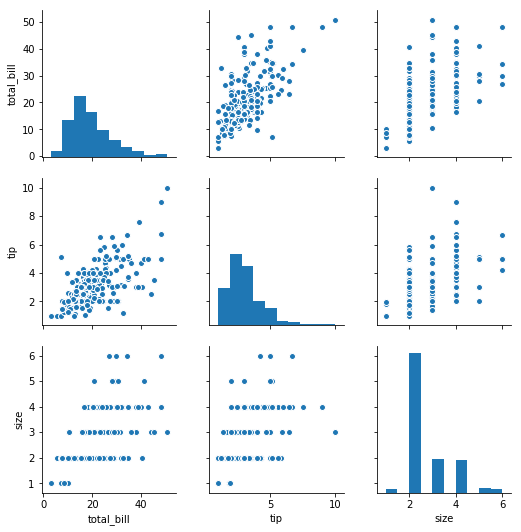

In [23]:
# pair plot
sns.pairplot(tips)
plt.show()

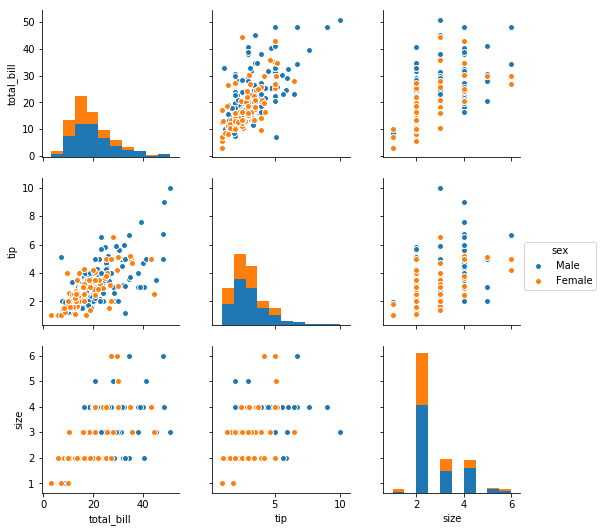

In [24]:
# pair plot
sns.pairplot(tips, hue ='sex')
plt.show()

In [26]:
# plot correlation using heatmap
covariance = tips.corr()

In [27]:
print(covariance)

            total_bill       tip      size
total_bill    1.000000  0.675734  0.598315
tip           0.675734  1.000000  0.489299
size          0.598315  0.489299  1.000000


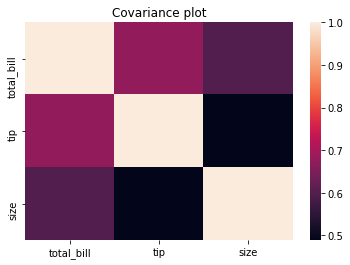

In [28]:
sns.heatmap(covariance)
plt.title('Covariance plot')
plt.show()

### Statsmodels

In [1]:
import statsmodels.api as sm
from sklearn import datasets ## imports datasets from scikit-learn
data = datasets.load_boston() ## loads Boston dataset from datasets library 

In [6]:
import numpy as np
import pandas as pd
# define the data/predictors as the pre-set feature names  
df = pd.DataFrame(data.data, columns=data.feature_names)

# Put the target (housing value -- MEDV) in another DataFrame
target = pd.DataFrame(data.target, columns=["MEDV"])

In [8]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
## Without a constant

import statsmodels.api as sm

X = df["RM"]
y = target["MEDV"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     4615.
Date:                Sat, 29 Sep 2018   Prob (F-statistic):          3.74e-256
Time:                        12:55:27   Log-Likelihood:                -1747.1
No. Observations:                 506   AIC:                             3496.
Df Residuals:                     505   BIC:                             3500.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RM             3.6534      0.054     67.930      0.000       3.548       3.759
==============================================================================
Omnibus:                       83.295   Durbin-Watson:                   0.493
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              152.507
Skew:                           0.955   Prob(JB):                     7.65e-34
Kurtosis:                       4.894   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""